***PRESENTACION DE LA SOLICITUD Y OBJETIVO***
1. **Objetivo del Análisis**
¿Cuál es el propósito principal del análisis?
El objetivo principal del análisis es entender los patrones de compra, identificar los productos más vendidos y los clientes más valiosos, y detectar posibles tendencias en las ventas. Esto podría ayudar a optimizar inventarios, mejorar estrategias de marketing, y aumentar la satisfacción del cliente.
¿Qué preguntas específicas quieres responder?
¿Cuáles son los productos más vendidos?
¿Quiénes son los clientes más valiosos?
¿Hay patrones estacionales o tendencias en las ventas?
¿Qué factores contribuyen a las compras repetidas?
2. **Contexto del Negocio**
¿Qué tipo de negocio está relacionado con estos datos?
El dataset parece estar relacionado con un comercio minorista en línea que vende una variedad de productos. Esto se deduce de la estructura típica de los datos de ventas en línea, que incluyen códigos de productos, descripciones, precios y transacciones con clientes.
¿Cuáles son los objetivos generales de la empresa?
Aumentar las ventas, mejorar la retención de clientes, optimizar la gestión de inventarios y mejorar la eficiencia en la operación de la tienda en línea.
¿Quiénes son los principales interesados (stakeholders)?
Directores de ventas, gerentes de marketing, equipos de operaciones y de gestión de inventario, y analistas financieros que se beneficiarían de una mejor comprensión de los datos de ventas y patrones de clientes.
3. **Alcance del Análisis**
¿Qué aspectos están dentro y fuera del alcance del análisis?
Dentro del alcance: análisis de ventas, identificación de productos y clientes clave, patrones estacionales, y tendencias de ventas.
Fuera del alcance: análisis detallado de la logística de entrega, estudio de competencia directa, o análisis de satisfacción del cliente basado en feedback no presente en el dataset.
¿Qué limitaciones deben tenerse en cuenta?
Limitaciones pueden incluir la calidad de los datos (posibles valores faltantes o erróneos), el periodo temporal cubierto por los datos, y la falta de datos cualitativos sobre la experiencia del cliente.
4. **Resultados Esperados**
¿Qué tipo de resultados se espera del análisis?
Informes detallados que identifiquen los productos más vendidos y los clientes más valiosos.
Visualizaciones que muestren tendencias y patrones en las ventas.
Posibles modelos predictivos para proyectar ventas futuras o recomendar estrategias de marketing.
¿Cómo se utilizarán estos resultados?
Los resultados se utilizarán para tomar decisiones estratégicas sobre inventarios, campañas de marketing, y para mejorar la experiencia del cliente y aumentar las ventas.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

file_path = 'Kaggle_Online_Retail.csv'
data =pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [4]:
#Obtener Suma de valores nulos por columna
data.isnull().sum()
#Obtener Suma de valores duplicados
data.duplicated().sum()

5268

In [5]:
#Obtener Valores unicos por columna
unique_values = {col:data[col].unique() for col in data.columns}

for key, value in unique_values.items():
    print(f'Column name: {key}')
    print(f'number of Unique Values: {len(value)}')
    print(f'unique values: {value[:10]}')
    print('----------------------')

Column name: InvoiceNo
number of Unique Values: 25900
unique values: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
----------------------
Column name: StockCode
number of Unique Values: 4070
unique values: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
----------------------
Column name: Description
number of Unique Values: 4224
unique values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
----------------------
Column name: Quantity
number of Unique Values: 722
unique values: [ 6  8  2 32  3  4 24 12 48 18]
----------------------
Column name: InvoiceDate
number of Unique Values: 23260
unique values: ['12/1/10 8:26' '12/1/10 8:28' 

In [6]:
#limpiar data: Antes de limpiar la data debemos tener en cuenta que columnas son las que vamos a utilizar y el porque estan duplicados los datos debido a que esto tambien puede ser importante
dataClean = data.drop_duplicates()
dataClean = dataClean.dropna(subset=['CustomerID'])

#obtener la cantidad total
dataClean['TotalAmount'] = dataClean['Quantity'] * dataClean['UnitPrice']
#Convertir la columna InvoiceDate a tipo datetime
dataClean['InvoiceDate'] = pd.to_datetime(dataClean['InvoiceDate'])
#Obtener el año y el mes de la fecha y el semestre
dataClean['year'] = dataClean['InvoiceDate'].dt.year
dataClean['month'] = dataClean['InvoiceDate'].dt.month
dataClean['semester'] = dataClean['month'].apply(lambda x: 1 if x < 7 else 2)
dataClean['TriMonth'] = dataClean['month'].apply(lambda x: 1 if x < 4 else 2 if x < 7 else 3 if x < 10 else 4)

C:\Users\jdsalazar\AppData\Local\Temp\ipykernel_17796\539449101.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataClean['InvoiceDate'] = pd.to_datetime(dataClean['InvoiceDate'])


In [7]:
#Obtener las ventas por año y por semestre  y por trimestre
sales_by_year = dataClean.groupby('year')['TotalAmount'].sum()
sales_by_semetser = dataClean.groupby(['year','semester'])['TotalAmount'].sum()
sales_by_TriMonth = dataClean.groupby(['year','TriMonth'])['TotalAmount'].sum()

In [8]:
total_returns = dataClean[dataClean['Quantity'] < 0].shape[0]
total_non_returns = dataClean[dataClean['Quantity'] > 0].shape[0]

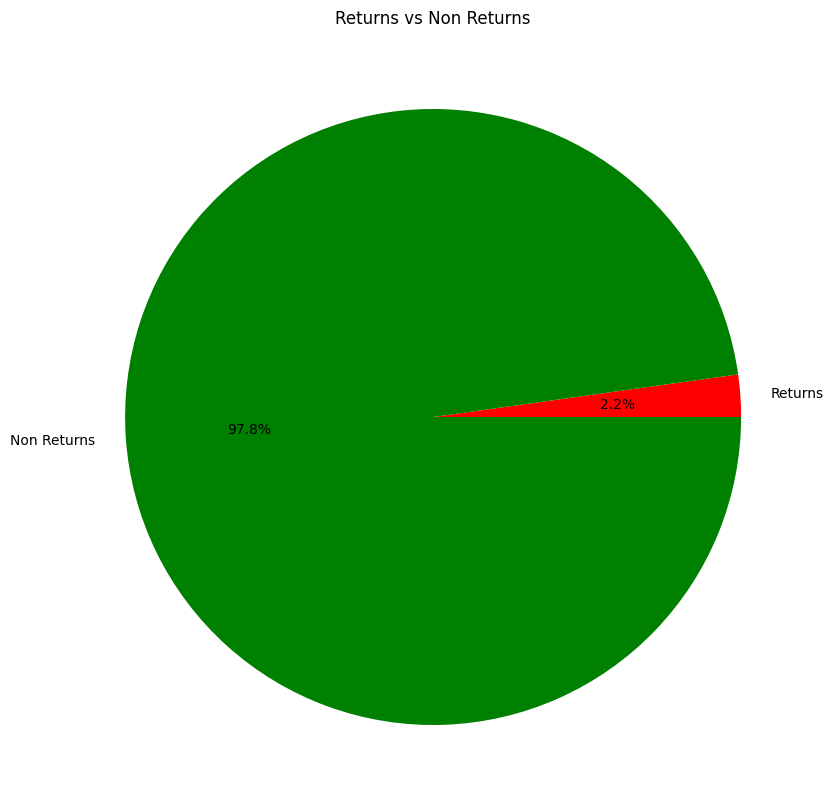

In [9]:
labels = ['Returns', 'Non Returns']
size = [total_returns, total_non_returns]
colors = ['red', 'green']

plt.figure(figsize=(10,10))
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Returns vs Non Returns')
plt.show()

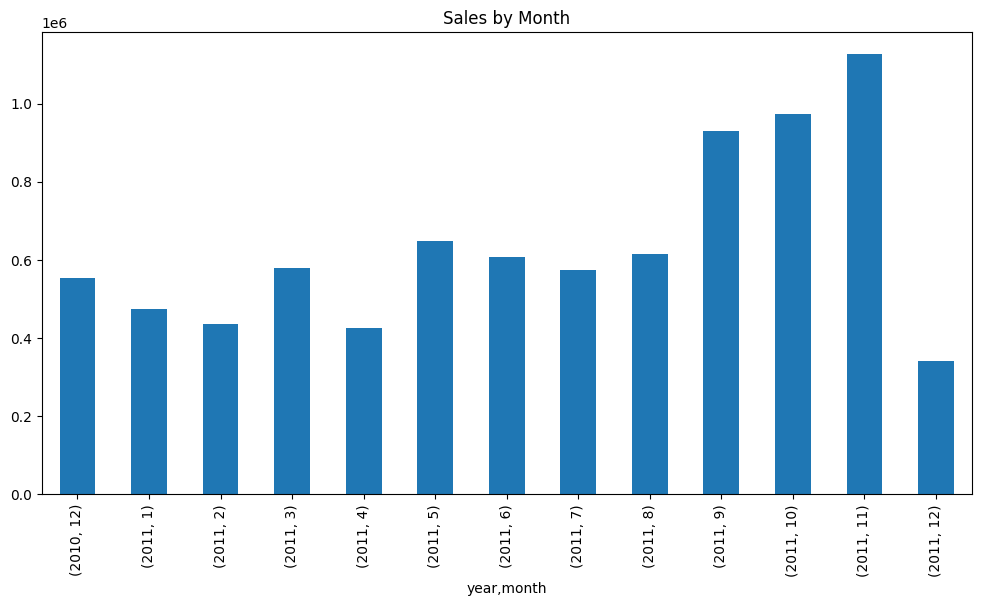

In [10]:
plt.figure(figsize=(12,6))
dataClean.groupby(['year','month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Sales by Month')
plt.show()


In [11]:
top_products = dataClean.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, dataClean[['StockCode', 'Description']].drop_duplicates(),
                         on='StockCode', how='left')

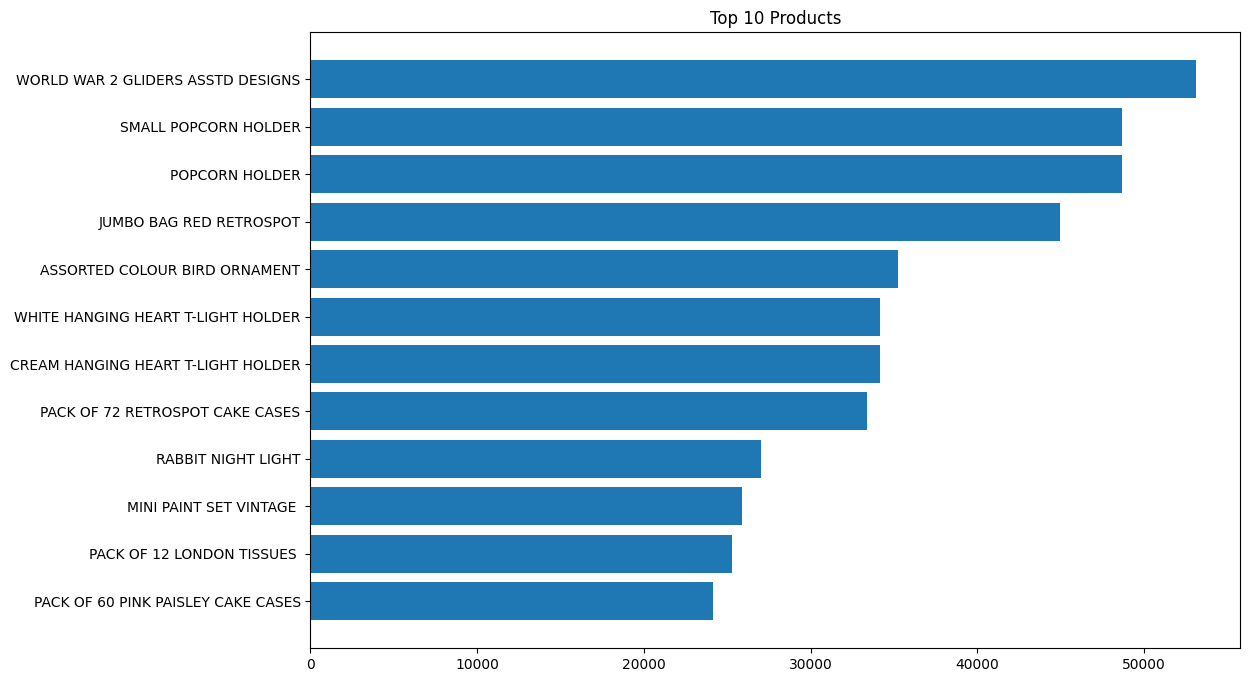

In [14]:
plt.figure(figsize=(12,8))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top 10 Products')
plt.gca().invert_yaxis()

plt.show()